<a href="https://colab.research.google.com/github/Malcolm777/Hello_world/blob/readme_edits/MACD_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover 
#                       to determine when to buy and sell stock 

In [1]:
#Import the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [18]:
#Store the data 
df = pd.read_csv('AAPL.csv')

#Set the index as date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,198.510406,22474900
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,206.917007,47218500
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,200.758102,36547400
2019-08-15,2019-08-15,203.460007,205.139999,199.669998,201.740005,199.758026,27227400
2019-08-16,2019-08-16,204.279999,207.160004,203.839996,206.500000,204.471252,27620400
...,...,...,...,...,...,...,...
2020-08-04,2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900
2020-08-05,2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000
2020-08-06,2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200
2020-08-07,2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300


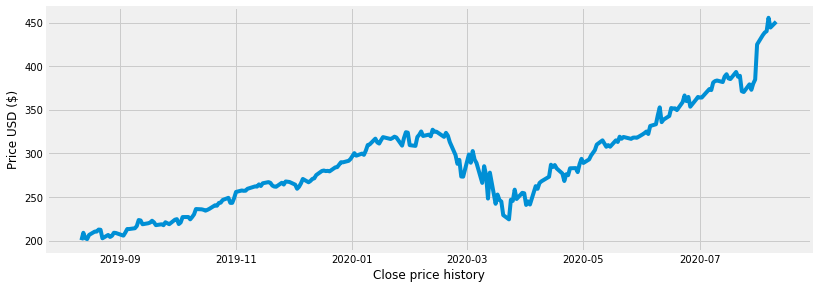

In [20]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close') 
plt.xlabel('Close price history')
plt.ylabel('Price USD ($)')
plt.show()

In [32]:
#Calculate the MACD and single line indicators 


#Calculate the short term EMA 
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 

#Calculate the long term EMA 
LongEMA = df.Close.ewm(span=26, adjust=False).mean() 

#Calculate the MACD 
MACD = ShortEMA - LongEMA 

#Calculate the signal line 
signal = MACD.ewm(span=9, adjust=False).mean()

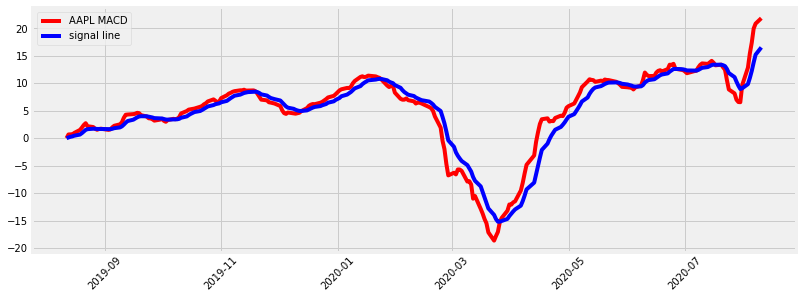

In [33]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label='AAPL MACD', color='red')
plt.plot(df.index, signal, label='signal line', color='blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [34]:
#Create new columns for the data 
df['MACD'] = MACD
df['Signal line'] = signal 

#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,198.510406,22474900,0.000000,0.000000
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,206.917007,47218500,0.677265,0.135453
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,200.758102,36547400,0.703986,0.249160
2019-08-15,2019-08-15,203.460007,205.139999,199.669998,201.740005,199.758026,27227400,0.636329,0.326593
2019-08-16,2019-08-16,204.279999,207.160004,203.839996,206.500000,204.471252,27620400,0.955784,0.452432
...,...,...,...,...,...,...,...,...,...
2020-08-04,2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900,15.435464,10.970757
2020-08-05,2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000,17.407307,12.258067
2020-08-06,2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200,19.979122,13.802278
2020-08-07,2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300,20.876140,15.217050


In [35]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
    

In [36]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1] 


In [37]:
#Show the data 
df 

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,198.510406,22474900,0.000000,0.000000,NaN,NaN
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,206.917007,47218500,0.677265,0.135453,208.970001,NaN
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,200.758102,36547400,0.703986,0.249160,NaN,NaN
2019-08-15,2019-08-15,203.460007,205.139999,199.669998,201.740005,199.758026,27227400,0.636329,0.326593,NaN,NaN
2019-08-16,2019-08-16,204.279999,207.160004,203.839996,206.500000,204.471252,27620400,0.955784,0.452432,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-04,2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900,15.435464,10.970757,NaN,NaN
2020-08-05,2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000,17.407307,12.258067,NaN,NaN
2020-08-06,2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200,19.979122,13.802278,NaN,NaN
2020-08-07,2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300,20.876140,15.217050,NaN,NaN


<function matplotlib.pyplot.show>

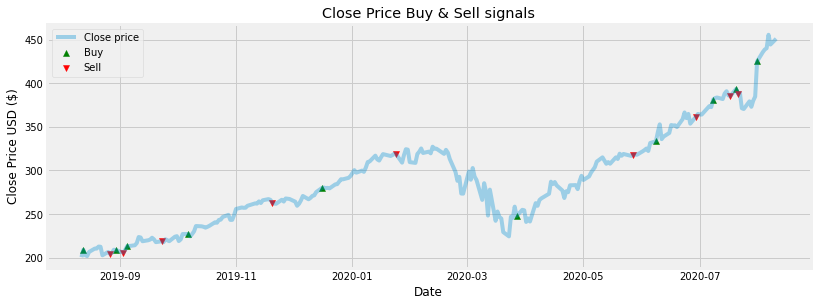

In [40]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show